In [927]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
myqo=pd.read_csv("/Users/aa085/Lets begin/Plo.csv")
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Foreign percentage,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,73.1000000000,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,69.3000000000,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,70.5000000000,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,70.2000000000,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,54.8000000000,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,49.6000000000,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,29.6000000000,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,42.4000000000,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,62.8000000000,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge


In [382]:
#We got unique values from genres column
Unq=[]
for a in range(1000):
    Unq.append(myqo["genres"].str.split(",")[a])
flat_data = [item for sublist in Unq for item in sublist]
flat_data=list(set(flat_data))
flat_data

['Comedy',
 'Music',
 'Fantasy',
 'War',
 'Documentary',
 'Thriller',
 'Romance',
 'Sci-Fi',
 'Crime',
 'Action',
 'Sport',
 'Animation',
 'Drama',
 'Family',
 'Mystery',
 'Biography',
 'Mpaa',
 'Unknown',
 'Horror',
 'Western',
 'History',
 'Musical',
 'Adventure']

In [400]:
df=myqo.copy()
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'linkselection', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mpaa', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Unknown', 'War', 'Western'],
      dtype='object')

In [426]:
#Moving on SQL to filter/join tables 
df1=df[df["Adventure"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df1 = df1[columns_to_keep]

df2=df[df["Fantasy"]==1]
columns_to_keep = ['Name','wordlwide', 'Fantasy']  
df2 = df2[columns_to_keep]

df1.to_csv("Ad1.csv")
df2.to_csv("Ad2.csv")

In [428]:
#Now We can assess our plot includes Adventure & Fantasy genres
df5=pd.read_csv("/Users/aa085/Lets begin/Ad5.csv")
df5 = df5.drop(0, axis=0)
df5

,Name,Worldwide,Adventure,Fantasy
1,Avatar: The Way of Water,2320250000,1,1
2,Spider-Man: No Way Home,1921850000,1,1
3,Frozen II,1453680000,1,1
4,Barbie,1439940000,1,1
5,The Super Mario Bros. Movie,1361960000,1,1
...,...,...,...,...
249,Hop,184367000,1,1
250,Storks,183801000,1,1
251,Mirror Mirror,183019000,1,1
252,Scooby-Doo 2: Monsters Unleashed,181239000,1,1


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/4274564423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5["Worldwide"])


<Axes: xlabel='Worldwide', ylabel='Density'>

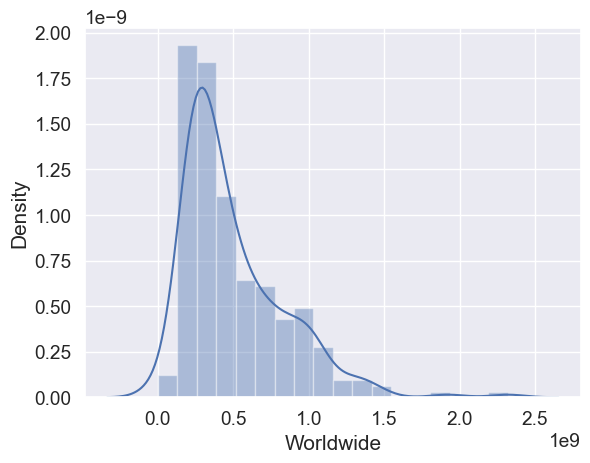

In [429]:
sns.distplot(df5["Worldwide"])

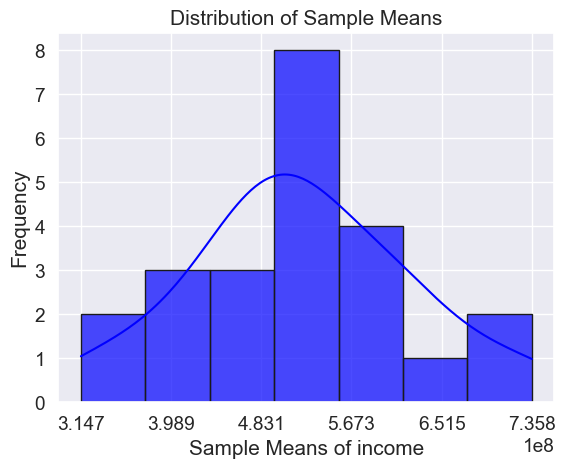

In [460]:
#Implementing clt for getting normal distribution
profit=df5["Worldwide"]
num_samples = 23
sample_size = len(profit) // num_samples
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(profit, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean) 
sns.histplot(sample_means,bins=7, kde=True,edgecolor='k',color='blue', alpha=0.7)
plt.xlabel('Sample Means of income')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
x_ticks = np.linspace(min(sample_means), max(sample_means),6)  
plt.xticks(x_ticks)
plt.show()

In [461]:
from scipy import stats
shapiro_stat, shapiro_pvalue = stats.shapiro(sample_means)
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means may follow a normal distribution.


In [466]:
len(sample_means)-1 #degrees of freedom

22

In [469]:
Interval1=np.mean(sample_means)-2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval1

476767748.396494

In [470]:
Interval2=np.mean(sample_means)+2.0739*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval2

563648658.1647707

# With a 95% confidence level, it is expected that movies falling within the Adventure and Fantasy genres will likely yield Gross Income falling within the range of 476767748.4 to 563648658.2.

In [2948]:
corr=myqo["wordlwide"].corr(myqo["IMDB"])
corr

0.20612476734800625

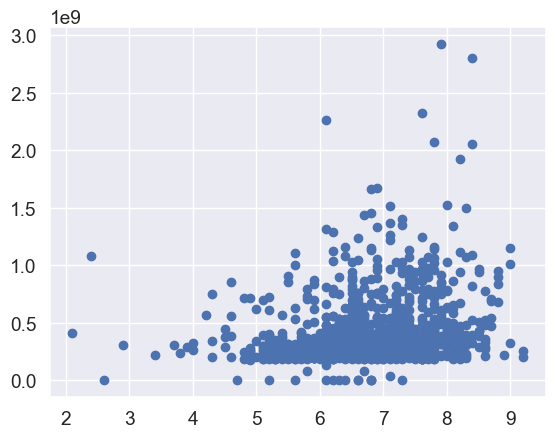

In [479]:
plt.scatter(myqo["IMDB"], myqo["wordlwide"])
plt.show()

In [ ]:
#We also can observe some kind of relationship between variables. But it is not so strong as its corellation coefficient is only 0.2
#it means highly likely there are also some values that has very good Imdb but didnt make as much as profit as other movies which has less imdb rating.

In [ ]:
#NULL HYPOTHESIS , THERE IS NO RELATIONSHIP p=0
#Alternative hypothesis , THERE IS A RELATIONSHIP p!=0

In [551]:
correlation

0.20612476734800625

In [474]:
T=correlation*np.sqrt(myqo.shape[0]-2)/np.sqrt(1-correlation**2)

In [475]:
T

6.654619139784417

In [476]:
criticalT=1.962 #On 95% signicance level

In [477]:
criticalT>T

False

# There is a significant corelattion between IMDB and Profit at 95% signifance level

In [2971]:
df.to_csv("Plo.csv")

In [488]:
df=pd.read_csv("/Users/aa085/Lets begin/Readytogo.csv")
df

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,0,0,0,0,1,0,0,0,0,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,0,0,0,0,1,0,0,0,0,0
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,0,0,0,0,1,0,0,0,0,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,0,0,0,1,0,0,0,0,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,0,0,0,0,0,0,0,0,0,0
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,0,0,0,1,0,0,0,0,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,0,0,0,0,0,0,0,0,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,0,0,0,0,0,0,0,0,1,0


In [489]:
df.describe()

,Unnamed: 0,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,TMDB,Domestic Percentage,Foreign percentage,Domestic Money,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
count,1000.0000000000,937.0000000000,1000.0000000000,1000.0000000000,923.0000000000,923.0000000000,923.0000000000,967.0000000000,999.0000000000,1000.0000000000,...,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000,1000.0000000000
mean,499.5000000000,118.3810032017,2008.1390000000,6.7827000000,64.4355362947,69.9263271939,68.4117009751,40.2762150982,61.0517517518,164677253.8370000124,...,0.0320000000,0.0560000000,0.1040000000,0.1490000000,0.2640000000,0.0190000000,0.2720000000,0.0040000000,0.0340000000,0.0130000000
std,288.8194360957,21.5525838243,10.6142518032,0.9556694062,24.0336648023,17.5070171940,7.3020926509,14.3818090525,15.8485244072,119758047.3792100698,...,0.1760880661,0.2300367730,0.3054132893,0.3562666500,0.4410198391,0.1365930366,0.4452125495,0.0631505185,0.1813198193,0.1133306836
min,0.0000000000,72.0000000000,1937.0000000000,2.1000000000,5.0000000000,14.0000000000,40.0000000000,0.2000000000,13.2000000000,6752.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,249.7500000000,102.0000000000,2002.0000000000,6.2000000000,46.0000000000,57.0000000000,63.0000000000,31.8000000000,51.0000000000,95857798.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,499.5000000000,116.0000000000,2010.0000000000,6.8000000000,69.0000000000,72.0000000000,68.0000000000,40.0000000000,60.4000000000,134916907.5000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,749.2500000000,131.0000000000,2016.0000000000,7.4000000000,85.0000000000,85.0000000000,73.5000000000,49.2500000000,69.2000000000,198399283.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000
max,999.0000000000,201.0000000000,2023.0000000000,9.2000000000,100.0000000000,100.0000000000,87.0000000000,100.0000000000,100.0000000000,936662225.0000000000,...,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


In [639]:
df2=pd.read_csv("/Users/aa085/Lets begin/Readytogo3.csv") #Contains Dummy for Actor

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,linkselection,Genre,BestActorPresent
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,https://watch.plex.tv/movie/avatar,1,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,https://watch.plex.tv/movie/avengers-endgame,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/avatar-2,1,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,https://watch.plex.tv/movie/titanic,0,1
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/star-wars-episode-...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,https://watch.plex.tv/movie/the-scorpion-king,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,https://watch.plex.tv/movie/sweet-home-alabama,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,https://watch.plex.tv/movie/daddys-home-2,0,1
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,https://watch.plex.tv/movie/hacksaw-ridge,0,0


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/3590273784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


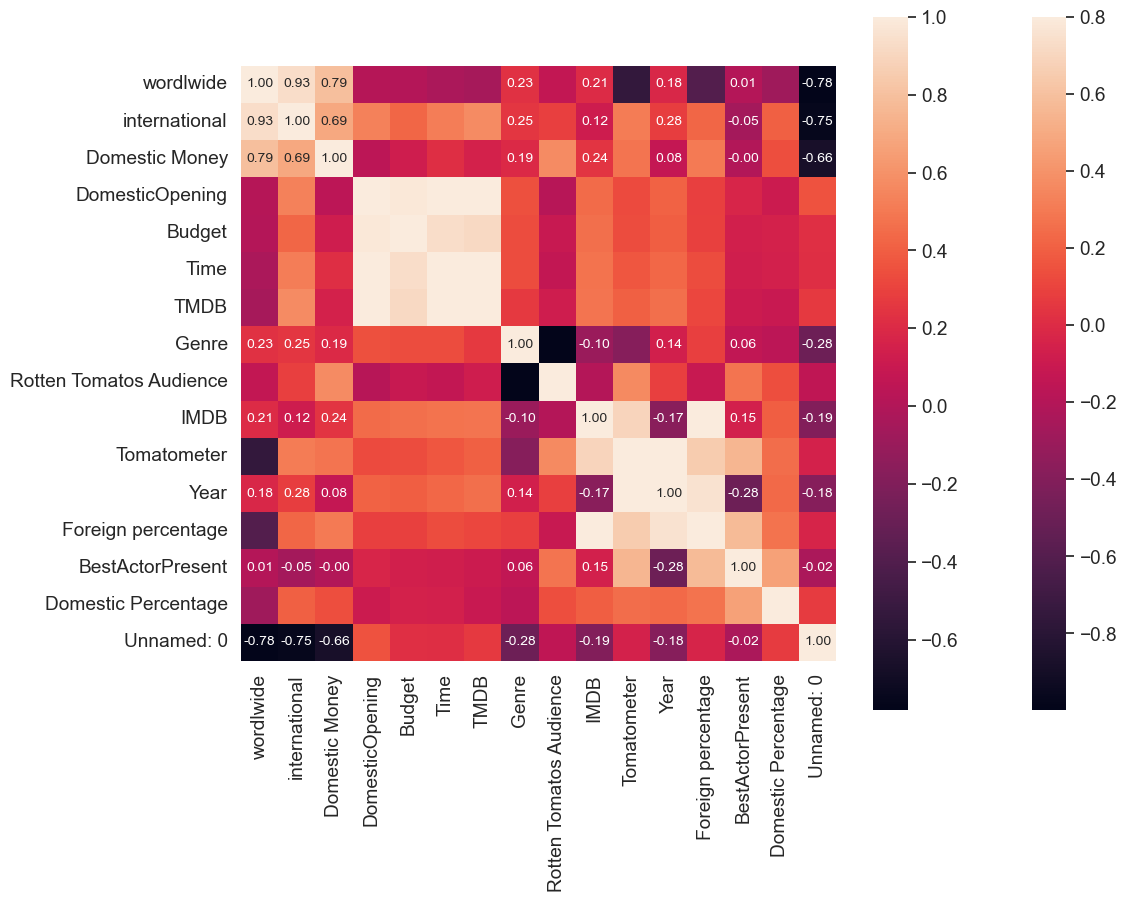

In [631]:
#Analysing corelattions between most important values
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
k = 23 #number of variables for heatmap
cols = corrmat.nlargest(k, 'wordlwide')['wordlwide'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [643]:
df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/229669580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/229669580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("BestActorPresent").sum()["wordlwide"][0]/df2.groupby("BestActorPresent").sum()["wordlwide"][1]


0.6907760614252545

In [847]:
flat_data

['Comedy',
 'Music',
 'Fantasy',
 'War',
 'Documentary',
 'Thriller',
 'Romance',
 'Sci-Fi',
 'Crime',
 'Action',
 'Sport',
 'Animation',
 'Drama',
 'Family',
 'Mystery',
 'Biography',
 'Mpaa',
 'Unknown',
 'Horror',
 'Western',
 'History',
 'Musical',
 'Adventure']

In [929]:
# Analysing genres for frouping them into categories
for a in flat_data:
    b=df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]
    print(f"{a} result : {b}")

Comedy result : 1.8885471282278719
Music result : 37.74202714456457
Fantasy result : 2.0264543458257838
War result : 34.77543829485879
Documentary result : 862.6729023773047
Thriller result : 3.1195613454297675
Romance result : 7.058329225895371
Sci-Fi result : 1.945022794759757
Crime result : 8.110797836654951
Action result : 0.8331494652882366
Sport result : 74.54210951369794
Animation result : 4.819779018988945
Drama result : 2.5431023058587137
Family result : 2.722702267042369
Mystery result : 9.749026674336251
Biography result : 33.40183060173476
Mpaa result : 468.01699364469187
Unknown result : 468.01699364469187
Horror result : 22.284429016733426
Western result : 120.3916989708686
History result : 41.35992782910192
Musical result : 15.716058079761293
Adventure result : 0.5649590701873508


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/191910093.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/191910093.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/191910093.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will de

In [931]:
weekgenre=[]
middlegenre=[]
stronggenre=[]
for a in flat_data:
    ratio = df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]

    if ratio >= 3:
        weekgenre.append(a)
    elif ratio<3 and ratio >1:
         middlegenre.append(a)
    else:
        stronggenre.append(a)

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/3794546233.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratio = df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/3794546233.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratio = df.groupby(a).sum()["wordlwide"][0] / df.groupby(a).sum()["wordlwide"][1]
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/3794546233.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numer

In [860]:
middlegenre

['Comedy', 'Fantasy', 'Sci-Fi', 'Drama', 'Family']

In [934]:
myqo['Middle'] = myqo['genres'].str.contains('Comedy') | myqo['genres'].str.contains('Fantasy') | myqo['genres'].str.contains('Sci-Fi') | myqo['genres'].str.contains('Drama') | myqo['genres'].str.contains('Family')
myqo['Middle'] = myqo['Middle'].astype(int)
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Domestic Money,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection,Middle
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,785221649,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,1
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,858373000,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,684075767,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,1
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,674292608,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,1
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,936662225,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,91047077,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,127223418,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama,1
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,104029443,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2,1
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,67209615,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge,1


In [935]:
myqo['Strong'] = myqo['genres'].str.contains('Action') | myqo['genres'].str.contains('Adventure')
myqo['Strong'] = myqo['Strong'].astype(int)
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,international,wordlwide,DomesticOpening,Budget,Date,MPAA,genres,linkselection,Middle,Strong
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,1,1
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,1,1
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,1,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama,1,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2,1,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge,1,0


In [949]:
myqo["BestActorPresent"]=df2["BestActorPresent"]
myqo=myqo.drop(['genres'],axis=1)
myqo

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,international,wordlwide,DomesticOpening,Budget,Date,MPAA,linkselection,Middle,Strong,BestActorPresent
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,https://watch.plex.tv/movie/avatar,1,1,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,https://watch.plex.tv/movie/avengers-endgame,1,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/avatar-2,1,1,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,https://watch.plex.tv/movie/titanic,1,0,1
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/star-wars-episode-...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,https://watch.plex.tv/movie/the-scorpion-king,1,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,https://watch.plex.tv/movie/sweet-home-alabama,1,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,https://watch.plex.tv/movie/daddys-home-2,1,0,1
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,https://watch.plex.tv/movie/hacksaw-ridge,1,0,0


In [1061]:
myqo #We have dummies for both genres & actors , Will split Actor dummy into diferent parts as this method going to contribute models better

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,international,wordlwide,DomesticOpening,Budget,Date,MPAA,linkselection,Middle,Strong,BestActorPresent
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0000000000,2009,7.9000000000,81.0000000000,82.0000000000,...,2138484377,2923706026,77025481.0000000000,237000000.0000000000,"December 16, 2009 (EMEA, LATAM)",PG-13,https://watch.plex.tv/movie/avatar,1,1,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0000000000,2019,8.4000000000,94.0000000000,90.0000000000,...,1941066100,2799439100,357115007.0000000000,356000000.0000000000,"April 24, 2019 (21 markets)",PG-13,https://watch.plex.tv/movie/avengers-endgame,1,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0000000000,2022,7.6000000000,76.0000000000,92.0000000000,...,1636174514,2320250281,134100226.0000000000,NaN,"December 14, 2022 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/avatar-2,1,1,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0000000000,1997,6.1000000000,60.0000000000,57.0000000000,...,1590450697,2264743305,28638131.0000000000,200000000.0000000000,"December 19, 1997 (Domestic)",PG-13,https://watch.plex.tv/movie/titanic,1,0,1
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0000000000,2015,7.8000000000,93.0000000000,85.0000000000,...,1134647993,2071310218,247966675.0000000000,245000000.0000000000,"December 16, 2015 (APAC, EMEA)",PG-13,https://watch.plex.tv/movie/star-wars-episode-...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0000000000,2002,5.5000000000,41.0000000000,38.0000000000,...,89583830,180630907,36075875.0000000000,60000000.0000000000,"April 18, 2002 (APAC)",PG-13,https://watch.plex.tv/movie/the-scorpion-king,1,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0000000000,2002,6.2000000000,38.0000000000,78.0000000000,...,53399006,180622424,35648740.0000000000,30000000.0000000000,"September 27, 2002 (Domestic)",PG-13,https://watch.plex.tv/movie/sweet-home-alabama,1,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0000000000,2017,6.0000000000,21.0000000000,51.0000000000,...,76584381,180613824,29651193.0000000000,69000000.0000000000,"November 9, 2017 (Netherlands)",PG-13,https://watch.plex.tv/movie/daddys-home-2,1,0,1
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0000000000,2016,8.1000000000,84.0000000000,91.0000000000,...,113354021,180563636,15190758.0000000000,40000000.0000000000,"November 3, 2016 (EMEA, APAC)",R,https://watch.plex.tv/movie/hacksaw-ridge,1,0,0


In [2801]:
output=pd.read_csv("/Users/aa085/Lets begin/Readytogo.csv")
output["Middle"]=myqo["Middle"]
output["Strong"]=myqo["Strong"]
output

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0,2009,7.9,81.0,82.0,...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0,0,1,0,0,0,1,1
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0,2019,8.4,94.0,90.0,...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3,0,0,0,0,1,1,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0,2022,7.6,76.0,92.0,...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0,0,1,0,0,0,1,1
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0,1997,6.1,60.0,57.0,...,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2,0,0,1,0,0,1,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0,2015,7.8,93.0,85.0,...,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0,2002,5.5,41.0,38.0,...,https://watch.plex.tv/movie/the-scorpion-king,"DwayneJohnson,StevenBrand,MichaelClarkeDuncan,...",2,0,0,1,0,0,1,1
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0,2002,6.2,38.0,78.0,...,https://watch.plex.tv/movie/sweet-home-alabama,"ReeseWitherspoon,PatrickDempsey,JoshLucas,Cand...",0,0,1,0,0,0,1,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0,2017,6.0,21.0,51.0,...,https://watch.plex.tv/movie/daddys-home-2,"WillFerrell,MarkWahlberg,MelGibson,JohnLithgow",2,0,0,1,0,0,1,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0,2016,8.1,84.0,91.0,...,https://watch.plex.tv/movie/hacksaw-ridge,"AndrewGarfield,SamWorthington,LukeBracey,Teres...",0,0,1,0,0,0,1,0


In [2802]:
#Adjusting dummy variables of Genres
output['Weak'] = 0
output.loc[output['Strong'] == 1, 'Middle'] = 0
output.loc[(output['Strong'] == 0) & (output['Middle'] == 0), 'Weak'] = 1

In [2803]:
Lastversion=output.copy()
output.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'genres', 'linkselection', 'Actors', 'BestActorPresent',
       'Fouractors', 'NOactor', 'OneActor', 'Threeactors', 'Twoactors',
       'Middle', 'Strong', 'Weak'],
      dtype='object')

# Let's start

In [2526]:
#pd.reset_option('^display.', silent=True)

In [2804]:
data0=output.copy()
data0 

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0,2009,7.9,81.0,82.0,...,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0,0,1,0,0,0,0,1,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0,2019,8.4,94.0,90.0,...,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3,0,0,0,0,1,0,1,0
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0,2022,7.6,76.0,92.0,...,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0,0,1,0,0,0,0,1,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0,1997,6.1,60.0,57.0,...,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2,0,0,1,0,0,1,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0,2015,7.8,93.0,85.0,...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0,2002,5.5,41.0,38.0,...,"DwayneJohnson,StevenBrand,MichaelClarkeDuncan,...",2,0,0,1,0,0,0,1,0
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0,2002,6.2,38.0,78.0,...,"ReeseWitherspoon,PatrickDempsey,JoshLucas,Cand...",0,0,1,0,0,0,1,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0,2017,6.0,21.0,51.0,...,"WillFerrell,MarkWahlberg,MelGibson,JohnLithgow",2,0,0,1,0,0,1,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0,2016,8.1,84.0,91.0,...,"AndrewGarfield,SamWorthington,LukeBracey,Teres...",0,0,1,0,0,0,1,0,0


In [2808]:
data0= data0.drop(data0.columns[[4,6,7,8,9,10,11]], axis=1)
data0 #Keeping most important columns for Model

,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
0,162.0,2009,76.0,2923706026,237000000.0,0,1,0,0,0,0,1,0
1,181.0,2019,83.0,2799439100,356000000.0,0,0,0,0,1,0,1,0
2,192.0,2022,77.0,2320250281,NaN,0,1,0,0,0,0,1,0
3,194.0,1997,62.0,2264743305,200000000.0,0,0,1,0,0,1,0,0
4,138.0,2015,73.0,2071310218,245000000.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,92.0,2002,56.0,180630907,60000000.0,0,0,1,0,0,0,1,0
996,108.0,2002,64.0,180622424,30000000.0,0,1,0,0,0,1,0,0
997,100.0,2017,63.0,180613824,69000000.0,0,0,1,0,0,1,0,0
998,139.0,2016,82.0,180563636,40000000.0,0,1,0,0,0,1,0,0


In [2811]:
output2=data0.dropna()
output2

,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
0,162.0,2009,76.0,2923706026,237000000.0,0,1,0,0,0,0,1,0
1,181.0,2019,83.0,2799439100,356000000.0,0,0,0,0,1,0,1,0
3,194.0,1997,62.0,2264743305,200000000.0,0,0,1,0,0,1,0,0
4,138.0,2015,73.0,2071310218,245000000.0,0,1,0,0,0,0,1,0
7,124.0,2015,67.0,1671537444,150000000.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,92.0,2002,56.0,180630907,60000000.0,0,0,1,0,0,0,1,0
996,108.0,2002,64.0,180622424,30000000.0,0,1,0,0,0,1,0,0
997,100.0,2017,63.0,180613824,69000000.0,0,0,1,0,0,1,0,0
998,139.0,2016,82.0,180563636,40000000.0,0,1,0,0,0,1,0,0


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/1773292495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output2["TMDB"])


<Axes: xlabel='TMDB', ylabel='Density'>

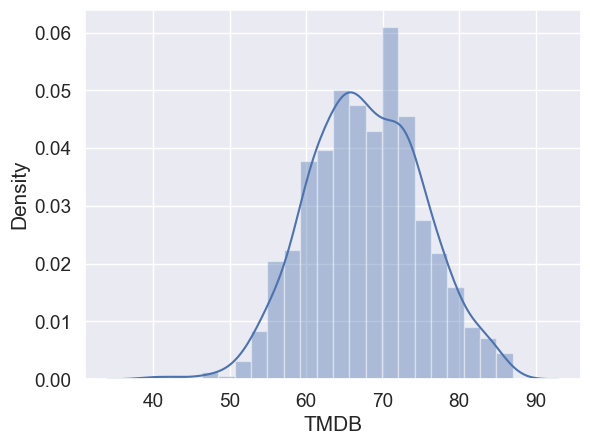

In [2912]:
sns.distplot(output2["TMDB"])

In [2812]:
q=output2["wordlwide"].quantile(0.99)
data1=output2[output2["wordlwide"]<q]
data1.describe()

,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
count,722.000000,722.000000,722.000000,7.220000e+02,7.220000e+02,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,117.775623,2007.652355,67.760388,4.074449e+08,9.658141e+07,0.013850,0.364266,0.344875,0.067867,0.209141,0.278393,0.693906,0.027701
std,21.146856,8.570159,7.404833,2.432949e+08,5.974547e+07,0.116951,0.481557,0.475657,0.251692,0.406977,0.448519,0.461189,0.164228
min,72.000000,1972.000000,40.000000,4.900000e+01,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2002.000000,62.250000,2.323373e+08,5.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116.000000,2009.000000,67.500000,3.239988e+08,8.500000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,131.000000,2014.000000,73.000000,4.881529e+08,1.400000e+08,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,201.000000,2023.000000,87.000000,1.453683e+09,3.170000e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/2831639846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["wordlwide"])


<Axes: xlabel='wordlwide', ylabel='Density'>

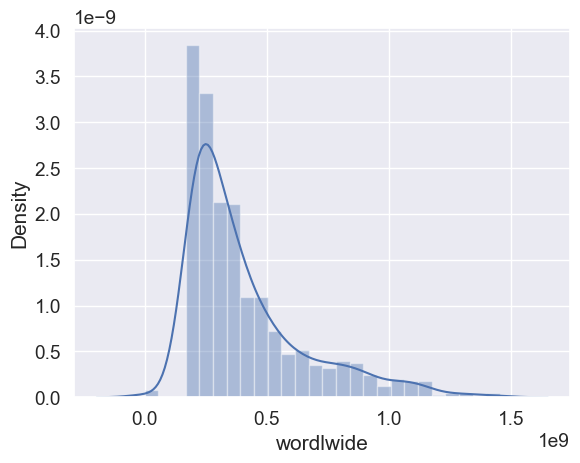

In [2813]:
sns.distplot(data1["wordlwide"])

59704079.28589863


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/1284477427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["Budget"])


<Axes: xlabel='Budget', ylabel='Density'>

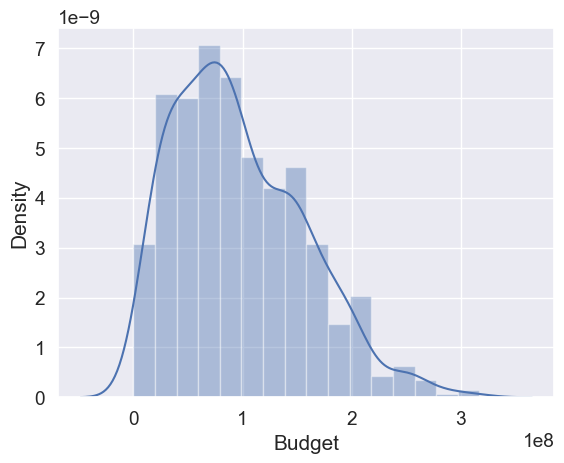

In [2814]:
print(np.std(data1["Budget"]))
sns.distplot(data1["Budget"])

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/3504614114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["Time"])


<Axes: xlabel='Time', ylabel='Density'>

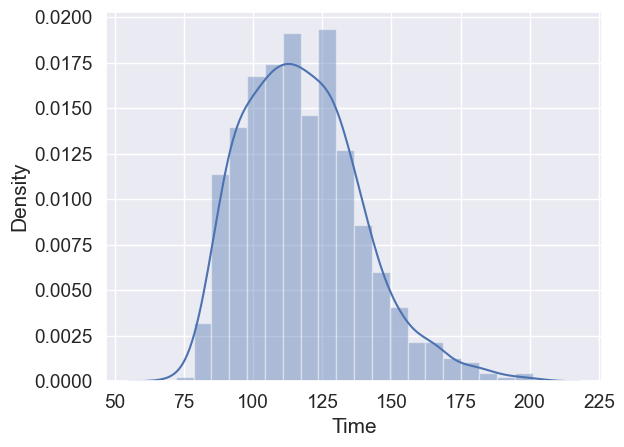

In [2245]:
sns.distplot(data1["Time"])

In [2816]:
data6=data1[data1["wordlwide"]>132218780]
data6

,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
12,103.0,2019,73.0,1453683476,150000000.0,0,1,0,0,0,0,1,0
14,141.0,2015,73.0,1405018048,250000000.0,0,0,0,0,1,0,1,0
18,152.0,2017,68.0,1334407706,317000000.0,0,1,0,0,0,0,1,0
19,128.0,2018,65.0,1310466296,170000000.0,0,1,0,0,0,0,1,0
20,102.0,2013,60.0,1284540518,150000000.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,92.0,2002,56.0,180630907,60000000.0,0,0,1,0,0,0,1,0
996,108.0,2002,64.0,180622424,30000000.0,0,1,0,0,0,1,0,0
997,100.0,2017,63.0,180613824,69000000.0,0,0,1,0,0,1,0,0
998,139.0,2016,82.0,180563636,40000000.0,0,1,0,0,0,1,0,0


In [2817]:
data6=data6.reset_index()

,index,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak
0,12,103.0,2019,73.0,1453683476,150000000.0,0,1,0,0,0,0,1,0
1,14,141.0,2015,73.0,1405018048,250000000.0,0,0,0,0,1,0,1,0
2,18,152.0,2017,68.0,1334407706,317000000.0,0,1,0,0,0,0,1,0
3,19,128.0,2018,65.0,1310466296,170000000.0,0,1,0,0,0,0,1,0
4,20,102.0,2013,60.0,1284540518,150000000.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,995,92.0,2002,56.0,180630907,60000000.0,0,0,1,0,0,0,1,0
715,996,108.0,2002,64.0,180622424,30000000.0,0,1,0,0,0,1,0,0
716,997,100.0,2017,63.0,180613824,69000000.0,0,0,1,0,0,1,0,0
717,998,139.0,2016,82.0,180563636,40000000.0,0,1,0,0,0,1,0,0


In [2818]:
log_profit=np.log(data6["wordlwide"])
data6["Profit Log"]=log_profit
data6

,index,Time,Year,TMDB,wordlwide,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak,Profit Log
0,12,103.0,2019,73.0,1453683476,150000000.0,0,1,0,0,0,0,1,0,21.097367
1,14,141.0,2015,73.0,1405018048,250000000.0,0,0,0,0,1,0,1,0,21.063316
2,18,152.0,2017,68.0,1334407706,317000000.0,0,1,0,0,0,0,1,0,21.011753
3,19,128.0,2018,65.0,1310466296,170000000.0,0,1,0,0,0,0,1,0,20.993649
4,20,102.0,2013,60.0,1284540518,150000000.0,0,1,0,0,0,0,1,0,20.973667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,995,92.0,2002,56.0,180630907,60000000.0,0,0,1,0,0,0,1,0,19.011966
715,996,108.0,2002,64.0,180622424,30000000.0,0,1,0,0,0,1,0,0,19.011919
716,997,100.0,2017,63.0,180613824,69000000.0,0,0,1,0,0,1,0,0,19.011872
717,998,139.0,2016,82.0,180563636,40000000.0,0,1,0,0,0,1,0,0,19.011594


In [2819]:
data6=data6.drop(["index","wordlwide"],axis=1)
data6

,Time,Year,TMDB,Budget,Fouractors,NOactor,OneActor,Threeactors,Twoactors,Middle,Strong,Weak,Profit Log
0,103.0,2019,73.0,150000000.0,0,1,0,0,0,0,1,0,21.097367
1,141.0,2015,73.0,250000000.0,0,0,0,0,1,0,1,0,21.063316
2,152.0,2017,68.0,317000000.0,0,1,0,0,0,0,1,0,21.011753
3,128.0,2018,65.0,170000000.0,0,1,0,0,0,0,1,0,20.993649
4,102.0,2013,60.0,150000000.0,0,1,0,0,0,0,1,0,20.973667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,92.0,2002,56.0,60000000.0,0,0,1,0,0,0,1,0,19.011966
715,108.0,2002,64.0,30000000.0,0,1,0,0,0,1,0,0,19.011919
716,100.0,2017,63.0,69000000.0,0,0,1,0,0,1,0,0,19.011872
717,139.0,2016,82.0,40000000.0,0,1,0,0,0,1,0,0,19.011594


In [2821]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data6[["Budget","Time","Year","TMDB","Middle","Weak","Fouractors","OneActor","Threeactors","Twoactors"]]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [2822]:
vif #There is strong multicollieanirty of Year , IMDB , TMDB 

,vif,Features
0,5.921801,Budget
1,47.783885,Time
2,101.115130,Year
3,110.793669,TMDB
4,1.977914,Middle
5,1.125287,Weak
6,1.105985,Fouractors
7,2.046500,OneActor
8,1.265085,Threeactors
9,1.691594,Twoactors


In [2823]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data6[["Budget","TMDB","Middle","Weak","Fouractors","OneActor","Threeactors","Twoactors"]]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [2824]:
vif 

,vif,Features
0,4.665596,Budget
1,7.499700,TMDB
2,1.895637,Middle
3,1.113831,Weak
4,1.052395,Fouractors
5,2.022584,OneActor
6,1.214287,Threeactors
7,1.619232,Twoactors


In [ ]:
data6=data6.drop(["Time","IMDB","Tomatometer","Rotten Tomatos Audience"],axis=1)
data6

In [ ]:
#COMPETETION IN MARKET , RELEASE TIME , MARKETING BUDGET

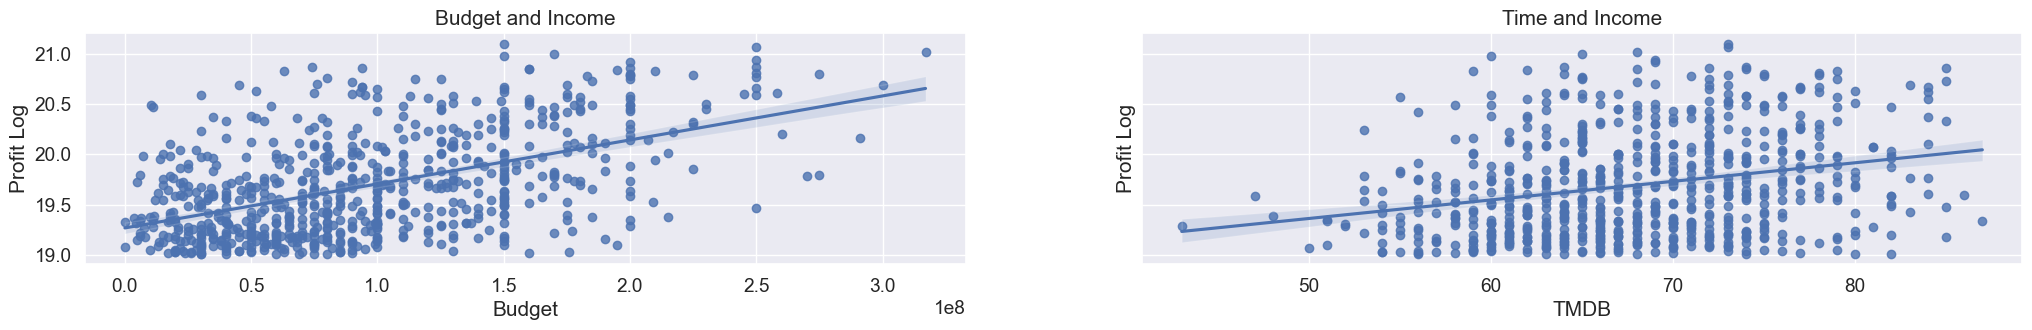

In [2826]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25, 3))

sns.regplot(x="Budget", y="Profit Log", data=data6, ax=ax1)
ax1.set_title("Budget and Income")
ax1.set_xlabel("Budget")

sns.regplot(x="TMDB", y="Profit Log", data=data6, ax=ax2)
ax2.set_title("Time and Income")
ax2.set_xlabel("TMDB")

plt.show()

In [2900]:
data6=data6.drop(["Time","Year","NOactor","Strong"],axis=1)
data6

,TMDB,Budget,Fouractors,OneActor,Threeactors,Twoactors,Middle,Weak,Profit Log
8,74.0,250000000.0,0,1,0,0,0,0,20.867406
9,85.0,94000000.0,1,0,0,0,0,0,20.861285
10,72.0,200000000.0,0,0,0,1,0,0,20.856460
11,74.0,160000000.0,0,0,0,1,0,0,20.847188
12,68.0,160000000.0,0,0,0,1,0,0,20.846736
...,...,...,...,...,...,...,...,...,...
714,56.0,60000000.0,0,1,0,0,0,0,19.011966
715,64.0,30000000.0,0,0,0,0,1,0,19.011919
716,63.0,69000000.0,0,1,0,0,1,0,19.011872
717,82.0,40000000.0,0,0,0,0,1,0,19.011594


In [2901]:
targets=data6["Profit Log"]
inputs=data6.drop(["Profit Log"],axis=1)

In [2902]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2903]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [2904]:
inputsscaled=scaler.transform(inputs)

In [2906]:
x_train,x_test,y_train,y_test=train_test_split(inputsscaled,targets,test_size=0.2,random_state=365)

In [2907]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [2908]:
y_hat=reg.predict(x_train)

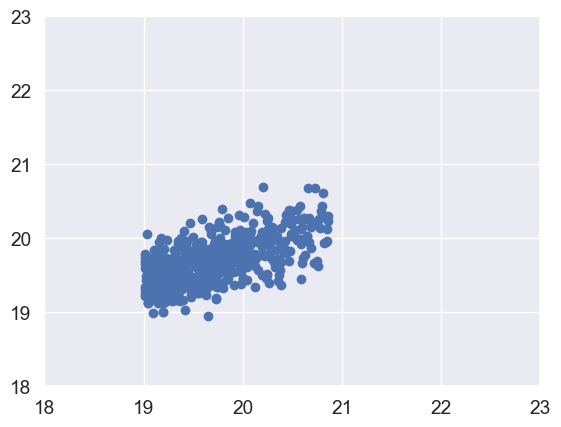

In [2909]:
plt.scatter(y_train,y_hat)
plt.xlim(18,23)
plt.ylim(18,23)
plt.show() #We can see model has hardships as profit increase 

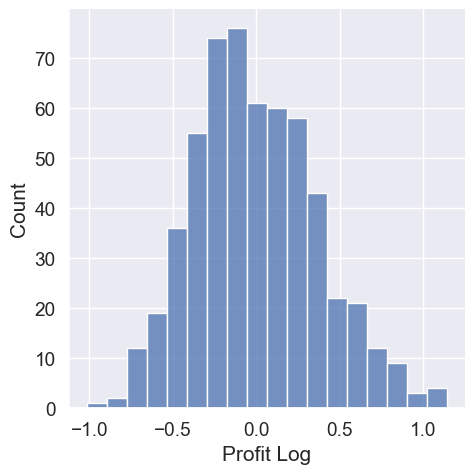

In [2910]:
sns.displot(y_train-y_hat) #We have big residuals but it is expected

In [2961]:
len(output["Budget"].iloc[:569])

569

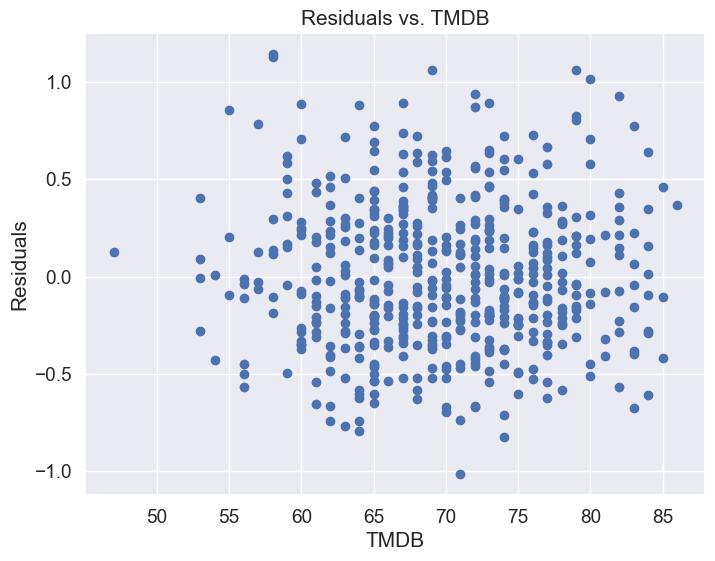

In [2965]:
#As we can see there is no significant relationship between our independent variables and residuals
#It means No Endogenity
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))
plt.scatter(output["TMDB"].iloc[:568], residuals)
plt.title("Residuals vs. TMDB")
plt.xlabel("TMDB")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [2968]:
corr = output["TMDB"].corr(residuals)
print(corr)

0.2105114064252349


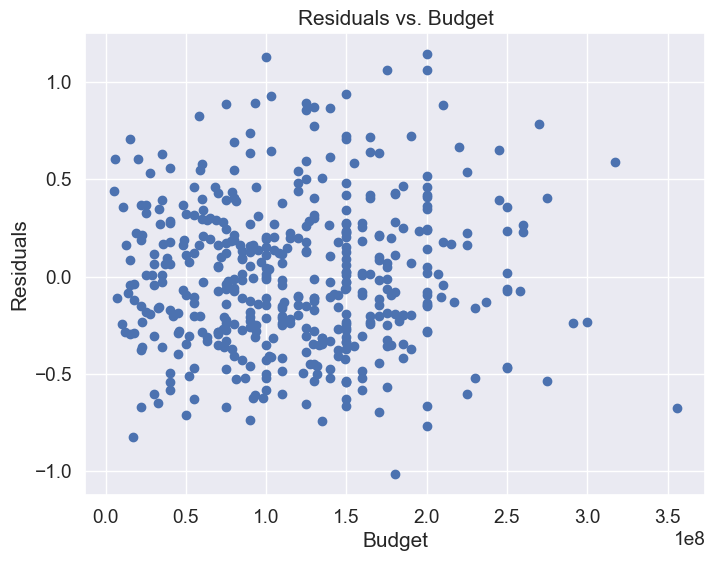

In [2963]:
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))
plt.scatter(output["Budget"].iloc[:568], residuals)
plt.title("Residuals vs. Budget")
plt.xlabel("Budget")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [2911]:
reg.score(x_train,y_train)

0.4107460779320118

In [2883]:
reg.intercept_

19.676589525840672

In [2932]:
reg.coef_

array([ 0.19565921,  0.24949877,  0.00855025, -0.04356569, -0.02342753,
       -0.03680627, -0.05888361,  0.00426107])

In [2933]:
#No Omitted Variable bias , everything is logical in our model. So there is nothing crucial missing. 

regsum=pd.DataFrame(inputs.columns.values,columns=["Features"])
regsum["weights"]=reg.coef_
regsum

,Features,weights
0,TMDB,0.1956592114
1,Budget,0.2494987717
2,Fouractors,0.0085502466
3,OneActor,-0.0435656902
4,Threeactors,-0.0234275291
5,Twoactors,-0.0368062689
6,Middle,-0.0588836131
7,Weak,0.0042610674


In [2934]:
y_hat_test=reg.predict(x_test)

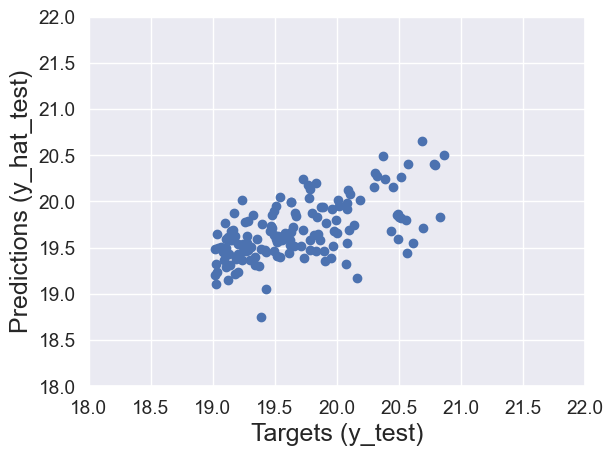

In [2935]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(18,22)
plt.ylim(18,22)
plt.show()

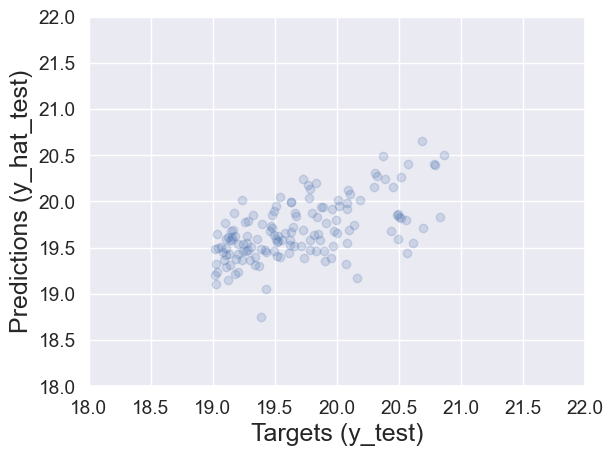

In [2936]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(18,22)
plt.ylim(18,22)
plt.show()

In [2937]:
df_pf=pd.DataFrame(y_hat_test,columns=["Prediction"])
df_pf.head()

,Prediction
0,19.3577471634
1,20.3922912851
2,20.2656614192
3,20.1316222175
4,19.8368476548


In [2938]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=["Prediction"])
df_pf.head()

,Prediction
0,255248251.1442145407
1,718223446.2459706068
2,632797750.2368885279
3,553416929.9551308155
4,412129284.2594768405


In [2939]:
df_pf["Target"]=np.exp(y_test)
df_pf.head()

,Prediction,Target
0,255248251.1442145407,441286194.9999999404
1,718223446.2459706068,1067316100.9999986887
2,632797750.2368885279,816037574.9999992847
3,553416929.9551308155,391081192.0000002980
4,412129284.2594768405,1113138547.9999985695


In [2940]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0   19.9052041912
1   20.7884130175
2   20.5199709597
3   19.7844257486
4   20.8304493831
Name: Profit Log, dtype: float64

In [2941]:
df_pf["Target"]=np.exp(y_test)
df_pf

,Prediction,Target
0,255248251.1442145407,441286194.9999999404
1,718223446.2459706068,1067316100.9999986887
2,632797750.2368885279,816037574.9999992847
3,553416929.9551308155,391081192.0000002980
4,412129284.2594768405,1113138547.9999985695
...,...,...
138,345037106.3906250000,485004754.0000002384
139,323697067.9185317159,253890701.0000002682
140,319153428.4498453736,424967620.0000002980
141,219691573.5743592680,182290265.9999999702


In [2942]:
df_pf["Residuals"]=df_pf["Target"]-df_pf["Prediction"]

In [2943]:
df_pf["Difference%"]=df_pf["Residuals"]/df_pf["Target"]*100

In [2944]:
df_pf

,Prediction,Target,Residuals,Difference%
0,255248251.1442145407,441286194.9999999404,186037943.8557853997,42.1581155186
1,718223446.2459706068,1067316100.9999986887,349092654.7540280819,32.7075225818
2,632797750.2368885279,816037574.9999992847,183239824.7631107569,22.4548268826
3,553416929.9551308155,391081192.0000002980,-162335737.9551305175,-41.5094720165
4,412129284.2594768405,1113138547.9999985695,701009263.7405216694,62.9759220000
...,...,...,...,...
138,345037106.3906250000,485004754.0000002384,139967647.6093752384,28.8590259075
139,323697067.9185317159,253890701.0000002682,-69806366.9185314476,-27.4946528737
140,319153428.4498453736,424967620.0000002980,105814191.5501549244,24.8993538732
141,219691573.5743592680,182290265.9999999702,-37401307.5743592978,-20.5174463755


In [2931]:
#pd.options.display.float_format = '{:.10f}'.format
#pd.set_option('display.max_rows', None) 

In [2945]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,143.0000000000,143.0000000000,143.0000000000,143.0000000000
mean,374140198.2219101787,402376469.7552447319,28236271.5333344974,-7.7090323487
std,134458167.1984687746,227442498.9427177310,179271343.4362242222,38.3319422496
min,139264785.5253227949,182016616.9999999702,-264883238.0351746976,-117.4605740674
25%,284963613.9212309122,231605115.4999997020,-82655074.5212772042,-35.0505933721
50%,334833622.0440130234,329398046.0000005960,-14806317.3150932789,-5.1436022348
75%,424380888.5347307920,483402813.4999998808,87861526.4872840345,17.3932349000
max,936188558.2215436697,1155046415.9999995232,701009263.7405216694,67.4217621372


In [2946]:
df_pf.sort_values(by="Difference%")

,Prediction,Target,Residuals,Difference%
91,490391448.0351745486,225508209.9999998510,-264883238.0351746976,-117.4605740674
136,426863893.1036307812,211468235.0000003576,-215395658.1036304235,-101.8572165714
115,383775752.6600126624,196393745.0000002384,-187382007.6600124240,-95.4113928934
105,342483142.2847272158,184287722.9999997318,-158195419.2847274840,-85.8415399081
102,356972959.0313984156,209196297.9999999404,-147776661.0313984752,-70.6401893553
...,...,...,...,...
23,365438764.1728693843,970766004.9999988079,605327240.8271293640,62.3556282059
4,412129284.2594768405,1113138547.9999985695,701009263.7405216694,62.9759220000
116,210757827.0696672201,569651467.0000008345,358893639.9303336143,63.0023199660
103,310207193.5235113502,894328469.0000007153,584121275.4764893055,65.3139529517


In [2929]:
data6 # The DataFrame we preprocessed & built model on 

,TMDB,Budget,Fouractors,OneActor,Threeactors,Twoactors,Middle,Weak,Profit Log
8,74.0,250000000.0,0,1,0,0,0,0,20.867406
9,85.0,94000000.0,1,0,0,0,0,0,20.861285
10,72.0,200000000.0,0,0,0,1,0,0,20.856460
11,74.0,160000000.0,0,0,0,1,0,0,20.847188
12,68.0,160000000.0,0,0,0,1,0,0,20.846736
...,...,...,...,...,...,...,...,...,...
714,56.0,60000000.0,0,1,0,0,0,0,19.011966
715,64.0,30000000.0,0,0,0,0,1,0,19.011919
716,63.0,69000000.0,0,1,0,0,1,0,19.011872
717,82.0,40000000.0,0,0,0,0,1,0,19.011594


#statsModels

# End of Analysis , below shows some statmodels codes to compare some models before creating the original one.

In [2205]:
#Utilized Statmodels to compare some models 
mynewdata=data0[['wordlwide',"Time","IMDB","Tomatometer","Budget","Middle","Strong","Weak",'Fouractors','NOactor','OneActor','Threeactors','Twoactors']]
myd=mynewdata.dropna()
myd.isna().sum()

wordlwide      0
Time           0
IMDB           0
Tomatometer    0
Budget         0
Middle         0
Strong         0
Weak           0
Fouractors     0
NOactor        0
OneActor       0
Threeactors    0
Twoactors      0
dtype: int64

In [2084]:
myd

,wordlwide,Time,IMDB,Tomatometer,Budget,Middle,Strong
0,2923706026,162.0000000000,7.9000000000,81.0000000000,237000000.0000000000,0,1
1,2799439100,181.0000000000,8.4000000000,94.0000000000,356000000.0000000000,0,1
3,2264743305,194.0000000000,6.1000000000,60.0000000000,200000000.0000000000,1,0
4,2071310218,138.0000000000,7.8000000000,93.0000000000,245000000.0000000000,0,1
7,1671537444,124.0000000000,6.9000000000,71.0000000000,150000000.0000000000,0,1
...,...,...,...,...,...,...,...
995,180630907,92.0000000000,5.5000000000,41.0000000000,60000000.0000000000,0,1
996,180622424,108.0000000000,6.2000000000,38.0000000000,30000000.0000000000,1,0
997,180613824,100.0000000000,6.0000000000,21.0000000000,69000000.0000000000,1,0
998,180563636,139.0000000000,8.1000000000,84.0000000000,40000000.0000000000,1,0


In [1109]:
log_profit3=np.log(myd["wordlwide"])
myd["Profit Log"]=log_profit3
myd

,index,wordlwide,Time,Tomatometer,IMDB,Budget,Middle,Strong,OneActor,Threeactors,Twoactors,Fouractors,Profit Log
0,0,2923706026,162.0000000000,81.0000000000,7.9000000000,237000000.0000000000,1,1,0,0,0,0,21.7961178355
1,1,2799439100,181.0000000000,94.0000000000,8.4000000000,356000000.0000000000,1,1,0,0,1,0,21.7526849126
2,3,2264743305,194.0000000000,60.0000000000,6.1000000000,200000000.0000000000,1,0,1,0,0,0,21.5407272583
3,4,2071310218,138.0000000000,93.0000000000,7.8000000000,245000000.0000000000,1,1,0,0,0,0,21.4514471995
4,7,1671537444,124.0000000000,71.0000000000,6.9000000000,150000000.0000000000,1,1,0,0,0,0,21.2370096650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,995,180630907,92.0000000000,41.0000000000,5.5000000000,60000000.0000000000,1,1,1,0,0,0,19.0119663194
726,996,180622424,108.0000000000,38.0000000000,6.2000000000,30000000.0000000000,1,0,0,0,0,0,19.0119193551
727,997,180613824,100.0000000000,21.0000000000,6.0000000000,69000000.0000000000,1,0,1,0,0,0,19.0118717409
728,998,180563636,139.0000000000,84.0000000000,8.1000000000,40000000.0000000000,1,0,0,0,0,0,19.0115938276


In [2206]:
Qua=myd["wordlwide"].quantile(0.99)
myd=myd[df2["wordlwide"]<Qua]

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_53587/827891339.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  myd=myd[df2["wordlwide"]<Qua]


In [2207]:
myd=myd[myd["wordlwide"]<1691537444]
myd

,wordlwide,Time,IMDB,Tomatometer,Budget,Middle,Strong,Weak,Fouractors,NOactor,OneActor,Threeactors,Twoactors
12,1453683476,103.0000000000,6.8000000000,77.0000000000,150000000.0000000000,0,1,0,0,1,0,0,0
14,1405018048,141.0000000000,7.3000000000,76.0000000000,250000000.0000000000,0,1,0,0,0,0,0,1
18,1334407706,152.0000000000,6.9000000000,91.0000000000,317000000.0000000000,0,1,0,0,1,0,0,0
19,1310466296,128.0000000000,6.1000000000,46.0000000000,170000000.0000000000,0,1,0,0,1,0,0,0
20,1284540518,102.0000000000,6.2000000000,63.0000000000,150000000.0000000000,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,180630907,92.0000000000,5.5000000000,41.0000000000,60000000.0000000000,0,1,0,0,0,1,0,0
996,180622424,108.0000000000,6.2000000000,38.0000000000,30000000.0000000000,1,0,0,0,1,0,0,0
997,180613824,100.0000000000,6.0000000000,21.0000000000,69000000.0000000000,1,0,0,0,0,1,0,0
998,180563636,139.0000000000,8.1000000000,84.0000000000,40000000.0000000000,1,0,0,0,1,0,0,0


In [2208]:
myd=myd[myd["wordlwide"]>132218780]
myd

,wordlwide,Time,IMDB,Tomatometer,Budget,Middle,Strong,Weak,Fouractors,NOactor,OneActor,Threeactors,Twoactors
12,1453683476,103.0000000000,6.8000000000,77.0000000000,150000000.0000000000,0,1,0,0,1,0,0,0
14,1405018048,141.0000000000,7.3000000000,76.0000000000,250000000.0000000000,0,1,0,0,0,0,0,1
18,1334407706,152.0000000000,6.9000000000,91.0000000000,317000000.0000000000,0,1,0,0,1,0,0,0
19,1310466296,128.0000000000,6.1000000000,46.0000000000,170000000.0000000000,0,1,0,0,1,0,0,0
20,1284540518,102.0000000000,6.2000000000,63.0000000000,150000000.0000000000,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,180630907,92.0000000000,5.5000000000,41.0000000000,60000000.0000000000,0,1,0,0,0,1,0,0
996,180622424,108.0000000000,6.2000000000,38.0000000000,30000000.0000000000,1,0,0,0,1,0,0,0
997,180613824,100.0000000000,6.0000000000,21.0000000000,69000000.0000000000,1,0,0,0,0,1,0,0
998,180563636,139.0000000000,8.1000000000,84.0000000000,40000000.0000000000,1,0,0,0,1,0,0,0


In [1170]:
myd.sort_values(by="wordlwide", ascending=False).head(10)

,index,wordlwide,Time,Tomatometer,IMDB,Budget,Middle,Strong,OneActor,Threeactors,Twoactors,Fouractors
0,0,2923706026,162.0000000000,81.0000000000,7.9000000000,237000000.0000000000,1,1,0,0,0,0
1,1,2799439100,181.0000000000,94.0000000000,8.4000000000,356000000.0000000000,1,1,0,0,1,0
2,3,2264743305,194.0000000000,60.0000000000,6.1000000000,200000000.0000000000,1,0,1,0,0,0
3,4,2071310218,138.0000000000,93.0000000000,7.8000000000,245000000.0000000000,1,1,0,0,0,0
4,7,1671537444,124.0000000000,71.0000000000,6.9000000000,150000000.0000000000,1,1,0,0,0,0
5,8,1663075401,118.0000000000,52.0000000000,6.8000000000,260000000.0000000000,1,1,0,0,0,0
6,9,1520538536,143.0000000000,91.0000000000,8.0000000000,220000000.0000000000,1,1,1,0,0,0
7,10,1515341399,137.0000000000,81.0000000000,7.1000000000,190000000.0000000000,0,1,1,0,0,0
8,12,1453683476,103.0000000000,77.0000000000,6.8000000000,150000000.0000000000,1,1,0,0,0,0
9,14,1405018048,141.0000000000,76.0000000000,7.3000000000,250000000.0000000000,1,1,0,0,1,0


In [2951]:
y=myd["wordlwide"]
z1=myd[["Tomatometer","IMDB","Budget","Middle","Weak",'Fouractors','OneActor','Threeactors','Twoactors']]
x1=myd["Budget"]

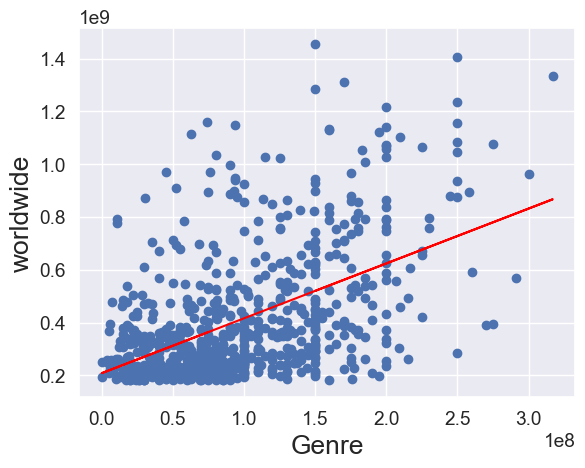

In [2952]:
plt.scatter(x1,y)
plt.xlabel("Genre",fontsize=19)
plt.ylabel("worldwide",fontsize=19)
slope, intercept = np.polyfit(x1, y, 1)
regression_line = slope * x1 + intercept
plt.plot(x1,regression_line, color='red', label="Regression Line")
plt.show()

In [2223]:
x=sm.add_constant(z1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wordlwide   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     50.03
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.25e-64
Time:                        11:25:41   Log-Likelihood:                -14740.
No. Observations:                 719   AIC:                         2.950e+04
Df Residuals:                     710   BIC:                         2.954e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.722e+08   7.09e+07     -2.430      0.015   -3.11e+08    -3.3e+07
Tomatometer  1.005e+06   5.05e+05      1.990      0.047    1.37e+04       2e+06
IMDB         5.342e+07   1.39e+07      3.843      0.000    2.61e+07    8.07e+07
Budget          2.1129      0.141     15.014      0.000       1.837       2.389
Middle      -3.705e+07   1.88e+07     -1.973      0.049   -7.39e+07    -1.8e+05
Weak        -2.201e-07   6.91e-08     -3.187      0.002   -3.56e-07   -8.45e-08
Fouractors   8.015e+07   6.44e+07      1.245      0.213   -4.62e+07    2.07e+08
OneActor    -6.667e+07   1.77e+07     -3.770      0.000   -1.01e+08    -3.2e+07
Threeactors -7.094e+07   3.12e+07     -2.272      0.023   -1.32e+08   -9.63e+06
Twoactors   -6.052e+07   2.04e+07     -2.966      0.003   -1.01e+08   -2.05e+07
==============================================================================
Omnibus:                      162.155   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.764
Skew:                           1.244   Prob(JB):                     1.66e-74
Kurtosis:                       5.270   Cond. No.                     7.76e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""